---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

In [26]:
from IPython.display import Image
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

def imageNcaption(filename, caption):
    display(Image(filename=filename))
    print(caption)

# Tarefa 6 - Transformação de intensidade

Nesta tarefa será estudado o efeito que a alteração de brilho, contraste e equalização do histograma tem em uma imagem médica. Para essa tarefa será utilizada a seguinte imagem, seguida de seu respectivo histograma calculado pela função *histogram* criada neste ambiente com o próposito de receber uma imagem, retornar seu histograma e realizar a apresentação gráfica da imagem utilizada e seu histograma.

Segue abaixo o carregamento e apresentação da imagem que será utilizada durante a tarefa:

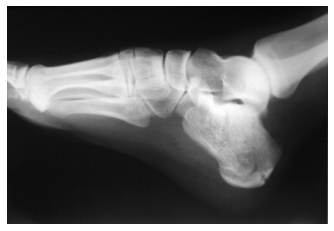

In [27]:
img = image.imread('RaiosX 1_1.jpg')
plt.imshow(img, cmap='gray')
plt.grid(False)
plt.axis(False);

## Alargamento de contraste

Nesta seção será trabalhado o alargamento de contraste por uma transformação linear por faixa das intensidades de pixels. A função abaixo permite construir uma função linear por partes que aplica diferentes transformações dependendo da intensidade do pixel.

In [28]:
def linear_transform(range_, y_end, y_start, x_end, x_start):
    a = (y_end-y_start)/(x_end-x_start) # derivative
    b = y_start - a*x_start
    transform_ = a*range_ + b
    return transform_

Para termos de ilustração serão utilizadas 3 faixas:

- De $r_0$ a $r_1$ de intensidade dos pixels;
- De $r_1+1$ a $r_2$ de intensidade dos pixels;
- De $r_2+1$ a $r_3$ de intensidade dos pixels;

Sendo os valores limítrofes $r_0=0$ e $r_3=255$.

Cada uma dessas faixas mapeará os pixels para valores nas respectivas faixas:

- De $s_0$ a $s_1$ de intensidade dos pixels;
- De $s_1+1$ a $s_2$ de intensidade dos pixels;
- De $s_2+1$ a $s_3$ de intensidade dos pixels;

Também com $s_0=0$ e $s_3=255$.

Abaixo vide os resultados padrões, consistindo na construção da função de transformação por partes de acordo com os coeficientes oferecidos.


In [60]:
r0, s0 = 0, 0
r1, s1 = 70, 86
r2, s2 = 120, 190
r3, s3 = 255, 255

trans_ = np.array([], dtype=np.uint8)

trans1 = linear_transform(np.arange(r0,r1+1, dtype=np.uint8), s1, s0, r1, r0)
trans2 = linear_transform(np.arange(r1+1,r2+1, dtype=np.uint8), s2, s1, r2, r1)
trans3 = linear_transform(np.arange(r2+1,r3+1, dtype=np.uint8), s3, s2, r3, r2)

trans_ = np.concatenate((trans1, trans2, trans3))
range_ = np.arange(0,256)

Com a função transformação criada, basta aplicar a cada pixel da imagem e observar os resultados com auxílio da função abaixo:

In [75]:
def apply_transform(img, trans_, range_):
    fig = plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,1,2)
    axes = [ax1, ax2, ax3]

    img_new = trans_[img]
        
    ax1.imshow(img, cmap='gray')
    ax2.imshow(img_new, cmap='gray')
    ax3.plot(range_, trans_)


    ax1.set_title('Original image')
    ax2.set_title('Transformed image')
    ax3.set_title('Transform function')

    ax3.set_xlabel('Original image pixels value')
    ax3.set_ylabel('Transformed image pixels value')

    ax1.grid(False)
    ax1.axis(False)

    ax2.grid(False)
    ax2.axis(False)

    return img_new

Assim:

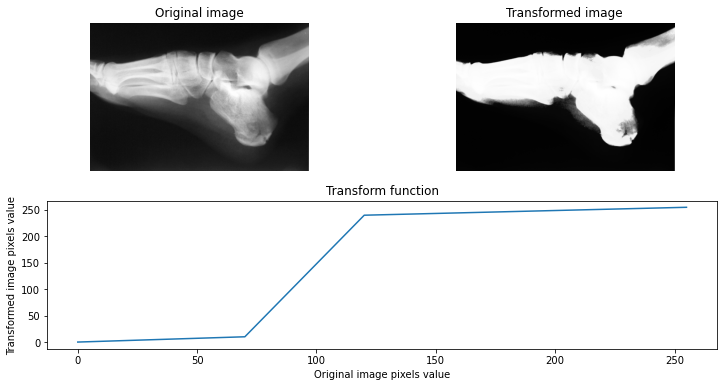

In [76]:
img_new = apply_transform(img, trans_, range_)

Na tarefa solicita-se que, inicialmente modifque-se os parâmetros $r_1$ e $r_2$ e em um segundo momento modifique-se $s_1$ e $s_2$. Para o primeiro caso tem-se:

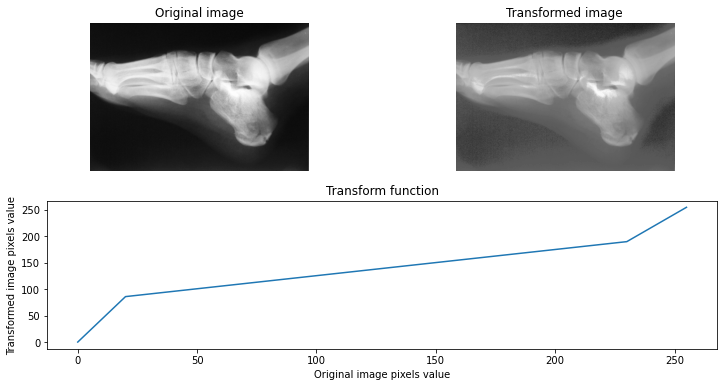

In [77]:
r0, s0 = 0, 0
r1, s1 = 20, 86
r2, s2 = 230, 190
r3, s3 = 255, 255

trans_ = np.array([], dtype=np.uint8)

trans1 = linear_transform(np.arange(r0,r1+1, dtype=np.uint8), s1, s0, r1, r0)
trans2 = linear_transform(np.arange(r1+1,r2+1, dtype=np.uint8), s2, s1, r2, r1)
trans3 = linear_transform(np.arange(r2+1,r3+1, dtype=np.uint8), s3, s2, r3, r2)

trans_ = np.concatenate((trans1, trans2, trans3))
range_ = np.arange(0,256)

img_new = apply_transform(img, trans_, range_)

Neste caso optou-se por uma transformação suave em que pixels de valores intermediários possuem leve alteração, enquanto que os pixels de valores de borda são transformados para valores maiores que eles a uma maior taxa. O efeito ocasionado na imagem foi um aumento no brilho devido ao incremento nos pixels de baixo valor.

Para o segundo caso solicitado, tem-se

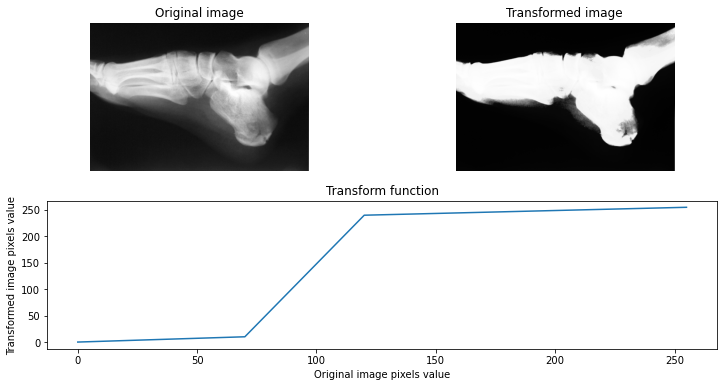

In [78]:
r0, s0 = 0, 0
r1, s1 = 70, 10
r2, s2 = 120, 240
r3, s3 = 255, 255

trans_ = np.array([], dtype=np.uint8)

trans1 = linear_transform(np.arange(r0,r1+1, dtype=np.uint8), s1, s0, r1, r0)
trans2 = linear_transform(np.arange(r1+1,r2+1, dtype=np.uint8), s2, s1, r2, r1)
trans3 = linear_transform(np.arange(r2+1,r3+1, dtype=np.uint8), s3, s2, r3, r2)

trans_ = np.concatenate((trans1, trans2, trans3))
range_ = np.arange(0,256)

img_new = apply_transform(img, trans_, range_)

Neste outro caso foi alterado como pixels de valores semi intermediários sofrem grande variação considerando pouca variação, enquanto que pixels fora desse intervalo quase que são forçados para o mesmo valor. Esse comportamento extremo casuou quase que uma binarização da imagem, principalmente para valores limítrofes.

## Transformações de potência

## Transformações logarítmica